In [77]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(10)

In [78]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [79]:
def load(f):
    return np.load(f)['arr_0']
# Load the data
x_train = load('data/kmnist-train-imgs.npz')
x_test = load('data/kmnist-test-imgs.npz')
y_train = load('data/kmnist-train-labels.npz')
y_test = load('data/kmnist-test-labels.npz')

In [80]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('{} train samples, {} test samples'.format(len(x_train), len(x_test)))

60000 train samples, 10000 test samples


In [81]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
train_size = x_train.shape[0]
test_size = x_test.shape[0]
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [82]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [83]:
fit = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 240s 4ms/step - loss: 0.4549 - acc: 0.8584 - val_loss: 0.3884 - val_acc: 0.8854
Epoch 2/12
60000/60000 [==============================] - 230s 4ms/step - loss: 0.1779 - acc: 0.9478 - val_loss: 0.2771 - val_acc: 0.9220
Epoch 3/12
60000/60000 [==============================] - 235s 4ms/step - loss: 0.1314 - acc: 0.9610 - val_loss: 0.2712 - val_acc: 0.9266
Epoch 4/12
60000/60000 [==============================] - 221s 4ms/step - loss: 0.1062 - acc: 0.9676 - val_loss: 0.2462 - val_acc: 0.9351
Epoch 5/12
60000/60000 [==============================] - 221s 4ms/step - loss: 0.0899 - acc: 0.9726 - val_loss: 0.2240 - val_acc: 0.9391
Epoch 6/12
60000/60000 [==============================] - 221s 4ms/step - loss: 0.0811 - acc: 0.9754 - val_loss: 0.2180 - val_acc: 0.9414
Epoch 7/12
60000/60000 [==============================] - 229s 4ms/step - loss: 0.0721 - acc: 0.9774 - val_loss: 0.2138 - 

In [84]:
%%time
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print(test_score)
print(train_score)

[0.22190879383957945, 0.9481]
[0.011007823542852808, 0.9972]
Wall time: 1min 34s


### SHOW ACCURACY AND LOST GRAPH

In [97]:
# loss
def plot_history_loss(fit, axL):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit, axR):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')


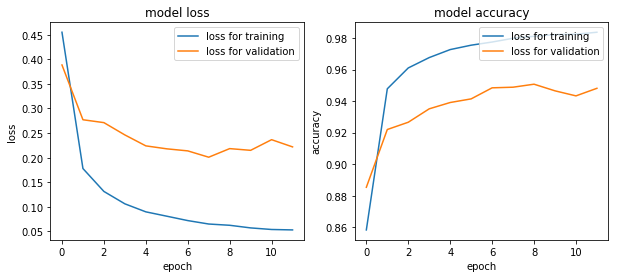

In [98]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plot_history_loss(fit, axL)
plot_history_acc(fit, axR)
# fig.savefig('./mnist-tutorial.png')
# plt.close()

### SAVE AND RELOAD TRAIN HISTORY

In [114]:
import pickle

# save:
f = open('history/kuzushi_mnist_cnn.pckl', 'wb')
pickle.dump(fit.history, f)
f.close()

# retrieve:    
f = open('history/kuzushi_mnist_cnn.pckl', 'rb')
history = pickle.load(f)
f.close()

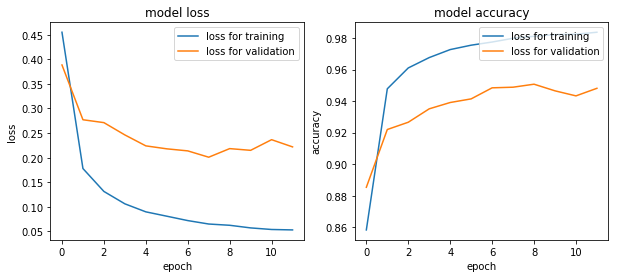

In [115]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plot_history_loss(fit, axL)
plot_history_acc(fit, axR)
# fig.savefig('./mnist-tutorial.png')

### SAVE MODEL 1

In [102]:
model_json = model.to_json()
with open("model/kuzushi_cnn_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model/kuzujshi_cnn_weights.h5")

### RELOAD MODEL 1

In [103]:
%%time
from keras.models import model_from_json
# with open("model/kuzujshi_cnn_model.json", "r") as json_file:
#     json_file.read(loaded_model_json)
json_file = open("model/kuzushi_cnn_model.json", "r")
loaded_model_json = json_file.read()
loaded_model=model_from_json(loaded_model_json)
json_file.close()
loaded_model.load_weights("model/kuzujshi_cnn_weights.h5")
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Wall time: 304 ms


In [104]:
%%time
test_score = loaded_model.evaluate(x_test, y_test, verbose=0)
print(test_score)

[0.036098980838153515, 0.9900099997520446]
Wall time: 5.57 s


### SAVE MODEL 2

In [105]:
model_yaml = model.to_yaml()
with open("model/kuzushi_cnn_model.yaml", "w") as json_file:
    json_file.write(model_yaml)
model.save_weights("model/kuzushi_cnn_weights.h5")

### RELOAD MODEL 2

In [106]:
%%time
from keras.models import model_from_yaml
# with open("model/kuzujshi_cnn_model.json", "r") as json_file:
#     json_file.read(loaded_model_json)
json_file = open("model/kuzushi_cnn_model.yaml", "r")
loaded_model_json = json_file.read()
loaded_model=model_from_yaml(loaded_model_json)
json_file.close()
loaded_model.load_weights("model/kuzujshi_cnn_weights.h5")
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Wall time: 264 ms


In [107]:
%%time
test_score= loaded_model.evaluate(x_test, y_test, verbose=0)
print(test_score)

[0.036098980838153515, 0.9900099997520446]
Wall time: 7.51 s


### SHOW GROUND TRUTH IMAGES

In [108]:

def convertDataArrayToImage(data, m, n, padding = 0):
    (row, col) = data[0].shape
    data = data - np.average(data)
    image = np.ones((row * m + padding * m, col * n + padding * n))
    k = 0
    for i in range(int(m)):
        for j in range(int(n)):
            image[ i * ( row + padding ) : (i + 1) * ( row + padding ) - padding, j * ( col + padding ) : (j + 1) * ( col + padding ) - padding] = data[k]
            k += 1
    return image

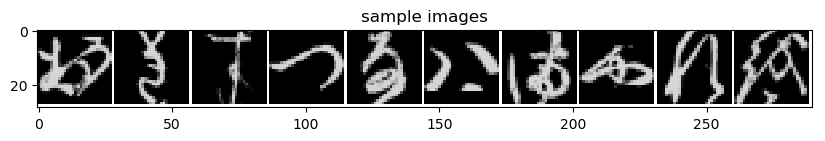

In [109]:
printData = np.zeros((num_classes, img_rows, img_rows))
for i in range(num_classes):
    all_idx = [idx for idx in range(train_size) if y_train[idx, i] == 1]
    img = x_train[all_idx[0]]
    img = img.reshape(img_rows, img_rows)
    printData[i, :, :] = img

A = convertDataArrayToImage(printData, 1, num_classes, 1)
fig=plt.figure(figsize=(10, 10), dpi=100)
ax1 = fig.add_subplot(1,1, 1)
ax1.set_title('sample images')
ax1.imshow(A)

### SHOW WRONG CLASSIFIERED IMAGES 

In [110]:
pred = loaded_model.predict(x_test)
pred_label = np.zeros( pred.shape )
idx = np.argmax(pred, axis=-1)
pred_label[np.arange(pred.shape[0]), idx] = 1
print(pred_label)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [111]:
k = 10 # show 10 samples
printData = np.zeros((num_classes * k, img_rows, img_rows))
for i in range(num_classes):
    miss_idx = [idx for idx in range(test_size) if y_test[idx,i] == 1 and y_test[idx,i] != pred_label[idx,i]]
    imgs = x_test[miss_idx]
    imgs = imgs.reshape(imgs.shape[0], img_rows, img_rows)
    printData[i * k : (i+1) * k, :, :] = imgs[:k]


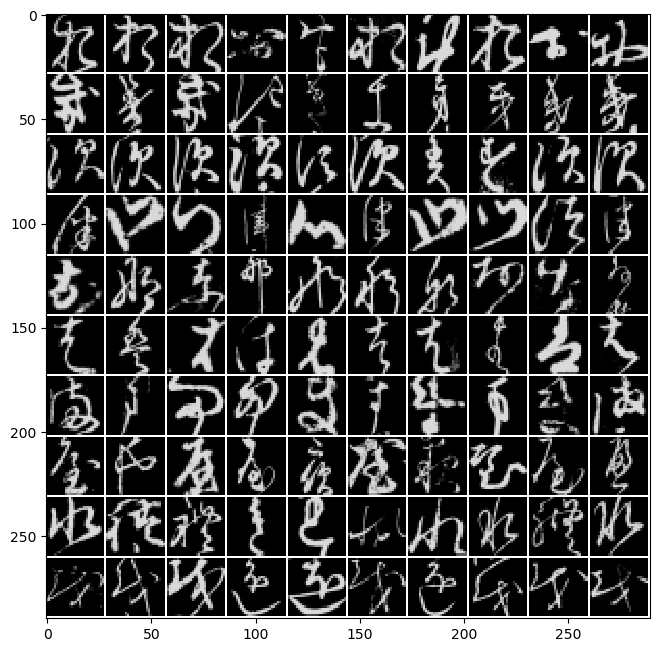

In [112]:

# A = convertDataArrayToImage(printData, 20, 20)
A = convertDataArrayToImage(printData, num_classes, k, 1)
fig=plt.figure(figsize=(8, 8), dpi=100)
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(A)